# Importing essential libraries for data manipulation, visualization, and machine learning


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading the training and test datasets from CSV files


In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('test.csv')


# Exploring the Data

In [3]:
# Checking the features and labels in the testing and training data
print("Training Data Columns:", train.columns)
print("Test Data Columns:", test.columns)

Training Data Columns: Index(['response_id', 'age', 'gender', 'years_at_company', 'job_role',
       'monthly_income', 'work_life_balance', 'job_satisfaction',
       'performance_rating', 'promotions_count', 'overtime',
       'distance_from_home', 'education_level', 'marital_status',
       'dependents_count', 'job_level', 'company_size', 'company_tenure',
       'remote_work', 'leadership_opportunities', 'innovation_opportunities',
       'company_reputation', 'employee_recognition', 'exit_status'],
      dtype='object')
Test Data Columns: Index(['response_id', 'age', 'gender', 'years_at_company', 'job_role',
       'monthly_income', 'work_life_balance', 'job_satisfaction',
       'performance_rating', 'promotions_count', 'overtime',
       'distance_from_home', 'education_level', 'marital_status',
       'dependents_count', 'job_level', 'company_size', 'company_tenure',
       'remote_work', 'leadership_opportunities', 'innovation_opportunities',
       'company_reputation', 'emplo

In [4]:
# visualising the data by printing the first few and last few columns of the data
print(test.head())

   response_id  age gender  years_at_company    job_role  monthly_income  \
0        52685   36   Male                13  Healthcare          8029.0   
1        30585   35   Male                 7   Education          4563.0   
2        54656   50   Male                 7   Education          5583.0   
3        33442   58   Male                44       Media          5525.0   
4        15667   39   Male                24   Education          4604.0   

  work_life_balance job_satisfaction performance_rating  promotions_count  \
0         Excellent             High            Average                 1   
1              Good             High            Average                 1   
2              Fair             High            Average                 3   
3               NaN              NaN               High                 0   
4              Good             High            Average                 0   

   ... marital_status  dependents_count job_level company_size  \
0  ...        

In [5]:

print(test.tail())

       response_id  age  gender  years_at_company    job_role  monthly_income  \
14895        16243   56  Female                42  Healthcare          7830.0   
14896        47175   30  Female                15   Education          3856.0   
14897        12409   52    Male                 5   Education          5654.0   
14898         9554   18    Male                 4   Education          5276.0   
14899        73042   59  Female                48   Education          3774.0   

      work_life_balance job_satisfaction performance_rating  promotions_count  \
14895              Poor           Medium            Average                 0   
14896              Good           Medium            Average                 2   
14897              Good        Very High      Below Average                 0   
14898               NaN              NaN            Average                 0   
14899              Good             High      Below Average                 1   

       ... marital_status 

In [6]:
# visualising the data by printing the first few and last few columns of the data
print(train.head())

   response_id  age  gender  years_at_company    job_role  monthly_income  \
0         8410   31    Male                19   Education          5390.0   
1        64756   59  Female                 4       Media          5534.0   
2        30257   24  Female                10  Healthcare          8159.0   
3        65791   36  Female                 7   Education          3989.0   
4        65026   56    Male                41   Education          4821.0   

  work_life_balance job_satisfaction performance_rating  promotions_count  \
0         Excellent           Medium            Average                 2   
1              Poor             High                Low                 3   
2              Good             High                Low                 0   
3              Good             High               High                 1   
4               NaN              NaN            Average                 0   

   ... dependents_count  job_level company_size company_tenure  remote_wor

In [7]:

print(train.head())

   response_id  age  gender  years_at_company    job_role  monthly_income  \
0         8410   31    Male                19   Education          5390.0   
1        64756   59  Female                 4       Media          5534.0   
2        30257   24  Female                10  Healthcare          8159.0   
3        65791   36  Female                 7   Education          3989.0   
4        65026   56    Male                41   Education          4821.0   

  work_life_balance job_satisfaction performance_rating  promotions_count  \
0         Excellent           Medium            Average                 2   
1              Poor             High                Low                 3   
2              Good             High                Low                 0   
3              Good             High               High                 1   
4               NaN              NaN            Average                 0   

   ... dependents_count  job_level company_size company_tenure  remote_wor

In [8]:
# visualising the features and labels of the data by printing out information about the columns
train_info = train.info()
print(train_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59611 entries, 0 to 59610
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   response_id               59611 non-null  int64  
 1   age                       59611 non-null  int64  
 2   gender                    59611 non-null  object 
 3   years_at_company          59611 non-null  int64  
 4   job_role                  59611 non-null  object 
 5   monthly_income            57811 non-null  float64
 6   work_life_balance         49467 non-null  object 
 7   job_satisfaction          52447 non-null  object 
 8   performance_rating        59611 non-null  object 
 9   promotions_count          59611 non-null  int64  
 10  overtime                  59611 non-null  object 
 11  distance_from_home        59611 non-null  int64  
 12  education_level           59611 non-null  object 
 13  marital_status            59611 non-null  object 
 14  depend

In [9]:
# Generate a statistical summary 
test_description = test.describe()
train_description = train.describe()
print(test_description)

        response_id           age  years_at_company  monthly_income  \
count  14900.000000  14900.000000      14900.000000    14453.000000   
mean   37339.022081     38.385235         15.592416     7284.073410   
std    21453.129293     12.097904         11.133792     2156.853841   
min        5.000000     18.000000          1.000000     1226.000000   
25%    18825.500000     28.000000          7.000000     5630.000000   
50%    37433.000000     38.000000         13.000000     7323.000000   
75%    55857.500000     49.000000         23.000000     8850.000000   
max    74471.000000     59.000000         51.000000    15063.000000   

       promotions_count  distance_from_home  dependents_count  company_tenure  
count      14900.000000        14900.000000      13708.000000    13857.000000  
mean           0.834362           49.927315          1.657135       55.669481  
std            0.996511           28.702307          1.544187       25.351729  
min            0.000000            1.000

In [10]:
# Get basic statistics
print(train_description)

        response_id           age  years_at_company  monthly_income  \
count  59611.000000  59611.000000      59611.000000    57811.000000   
mean   37224.692171     38.562497         15.752630     7311.070350   
std    21519.598309     12.082500         11.245724     2197.444033   
min        1.000000      6.000000          1.000000     1316.000000   
25%    18576.000000     28.000000          7.000000     5661.000000   
50%    37207.000000     39.000000         13.000000     7358.000000   
75%    55874.500000     49.000000         23.000000     8882.000000   
max    74498.000000     59.000000         51.000000    56050.000000   

       promotions_count  distance_from_home  dependents_count  company_tenure  
count      59611.000000        59611.000000      54831.000000    55427.000000  
mean           0.832514           50.024912          1.648465       55.772909  
std            0.994987           28.519542          1.555767       25.395430  
min            0.000000            1.000

In [11]:
print(train.shape)

(59611, 24)


# Data Cleaning

In [12]:
# Separate the features from the target variable in the training dataset
X = train.drop(columns=['exit_status'])
y = train['exit_status']

In [13]:
# Check for missing values in each column of the features DataFrame
X.isna().sum()
df=train

In [14]:
# Remove duplicate rows from the DataFrame 'df'
df.drop_duplicates(inplace=True)
df.shape

(59598, 24)

In [15]:
# List of continuous (numerical) features
continuous_features = ['age', 'years_at_company', 'monthly_income', 'distance_from_home',
                       'dependents_count', 'company_tenure']

# List of categorical features
categorical_features = ['gender', 'job_role', 'work_life_balance', 'job_satisfaction',
                        'performance_rating', 'overtime', 'education_level', 'marital_status',
                        'job_level', 'company_size', 'remote_work', 'leadership_opportunities',
                        'innovation_opportunities', 'company_reputation', 'employee_recognition']

# Fill missing values in continuous features with the mean
for feature in continuous_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

# Fill missing values in categorical features with the mode (most frequent value)
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

# Display the count of missing values in each column after imputation
print(df.isnull().sum())


/tmp/ipykernel_76611/4091487565.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mean(), inplace=True)
/tmp/ipykernel_76611/4091487565.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

response_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work_life_balance           0
job_satisfaction            0
performance_rating          0
promotions_count            0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
dependents_count            0
job_level                   0
company_size                0
company_tenure              0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
exit_status                 0
dtype: int64


In [16]:
df.dtypes

response_id                   int64
age                           int64
gender                       object
years_at_company              int64
job_role                     object
monthly_income              float64
work_life_balance            object
job_satisfaction             object
performance_rating           object
promotions_count              int64
overtime                     object
distance_from_home            int64
education_level              object
marital_status               object
dependents_count            float64
job_level                    object
company_size                 object
company_tenure              float64
remote_work                  object
leadership_opportunities     object
innovation_opportunities     object
company_reputation           object
employee_recognition         object
exit_status                  object
dtype: object

# Data Visualization

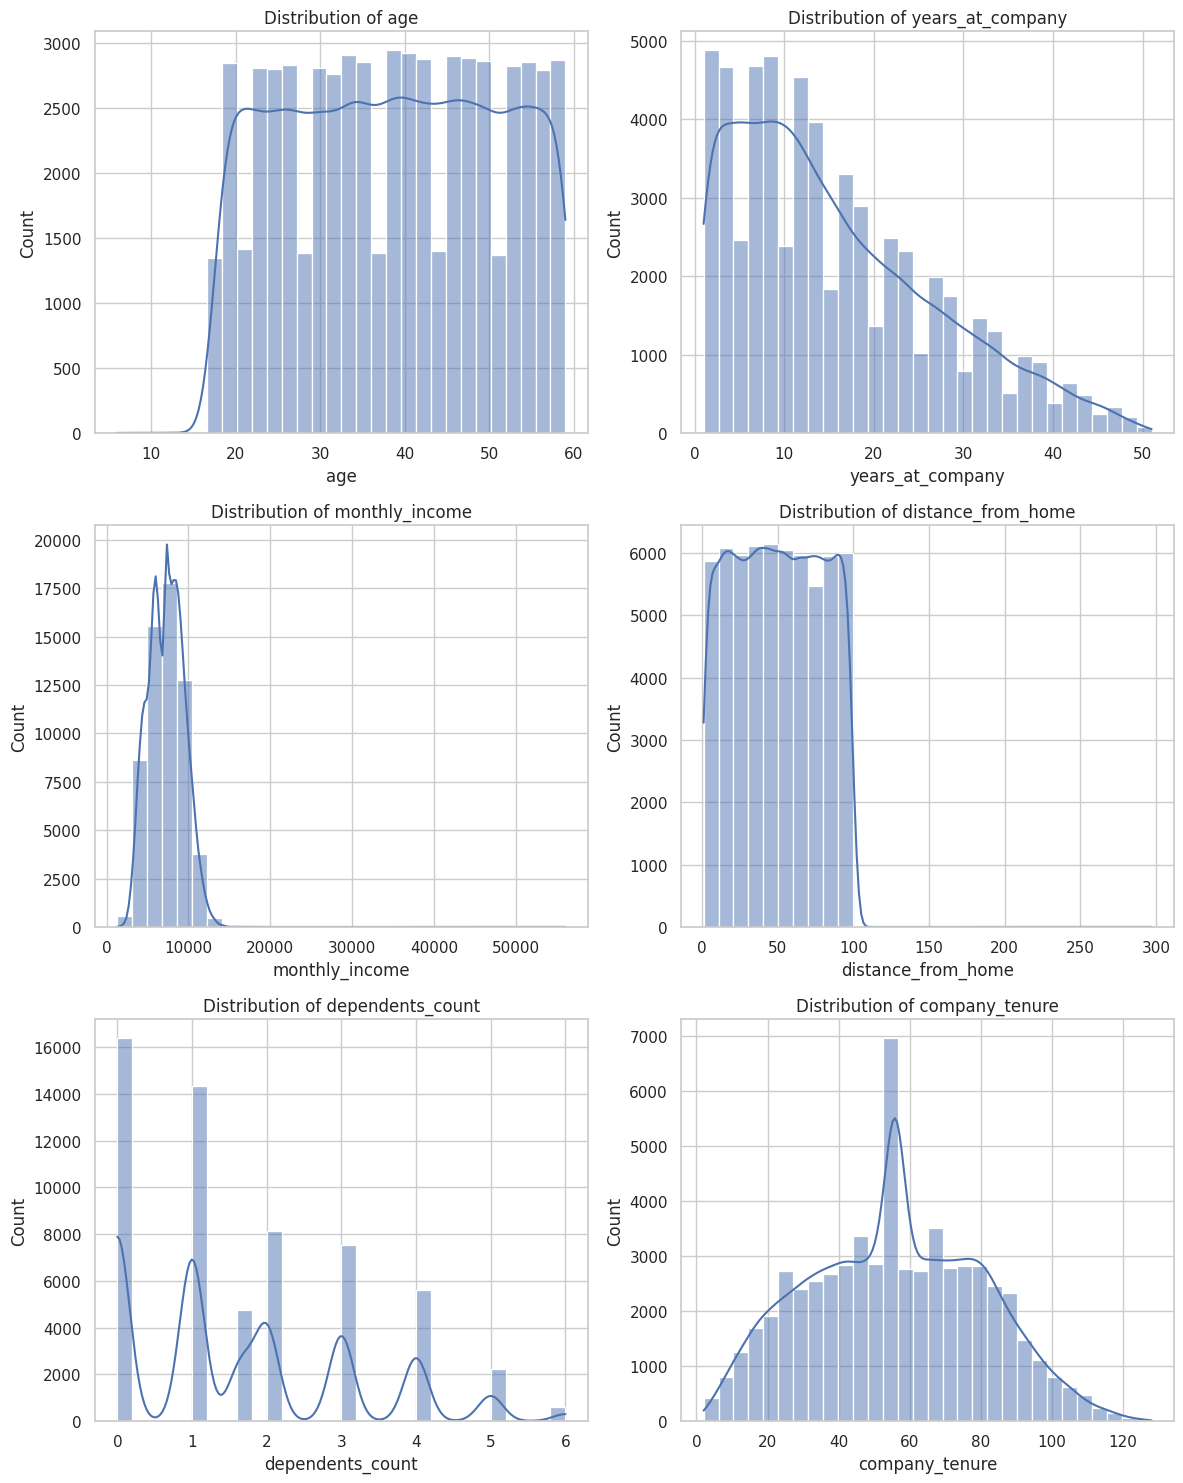

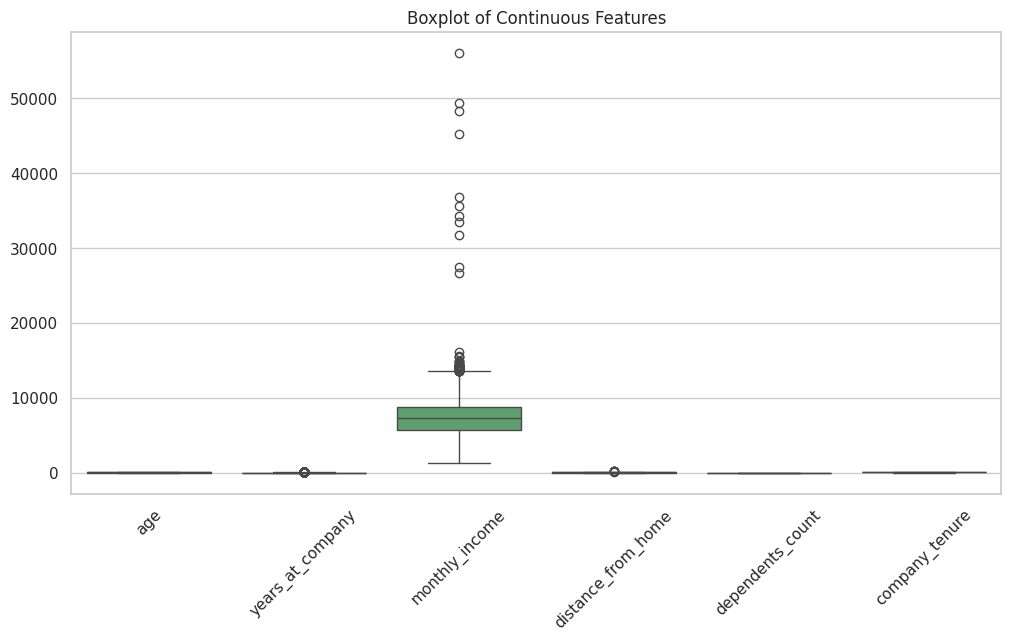

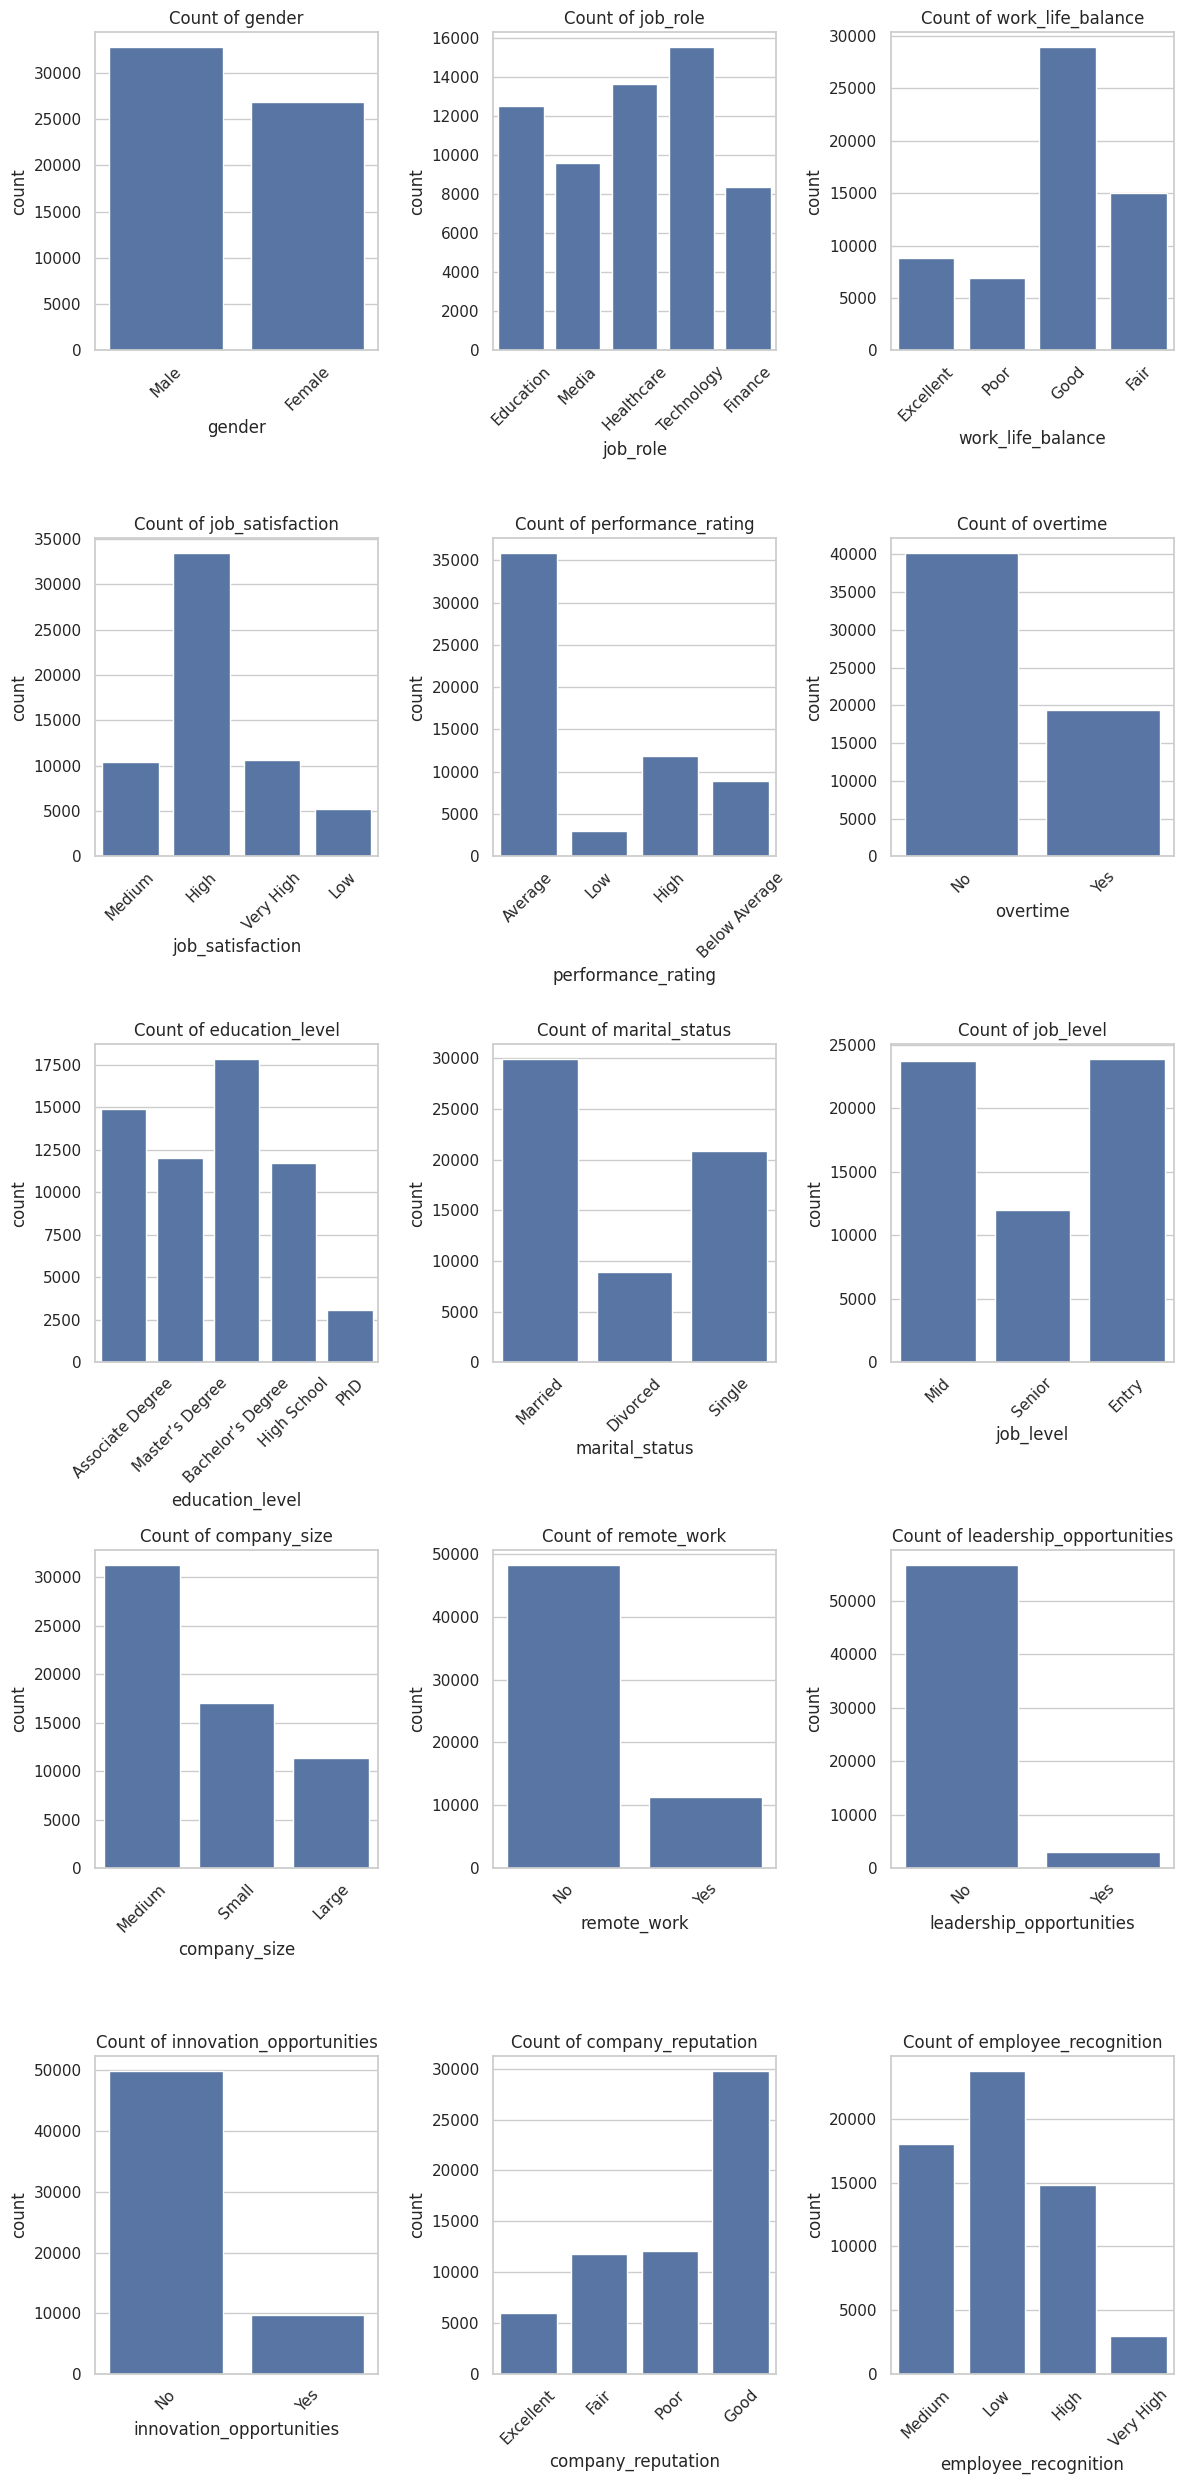

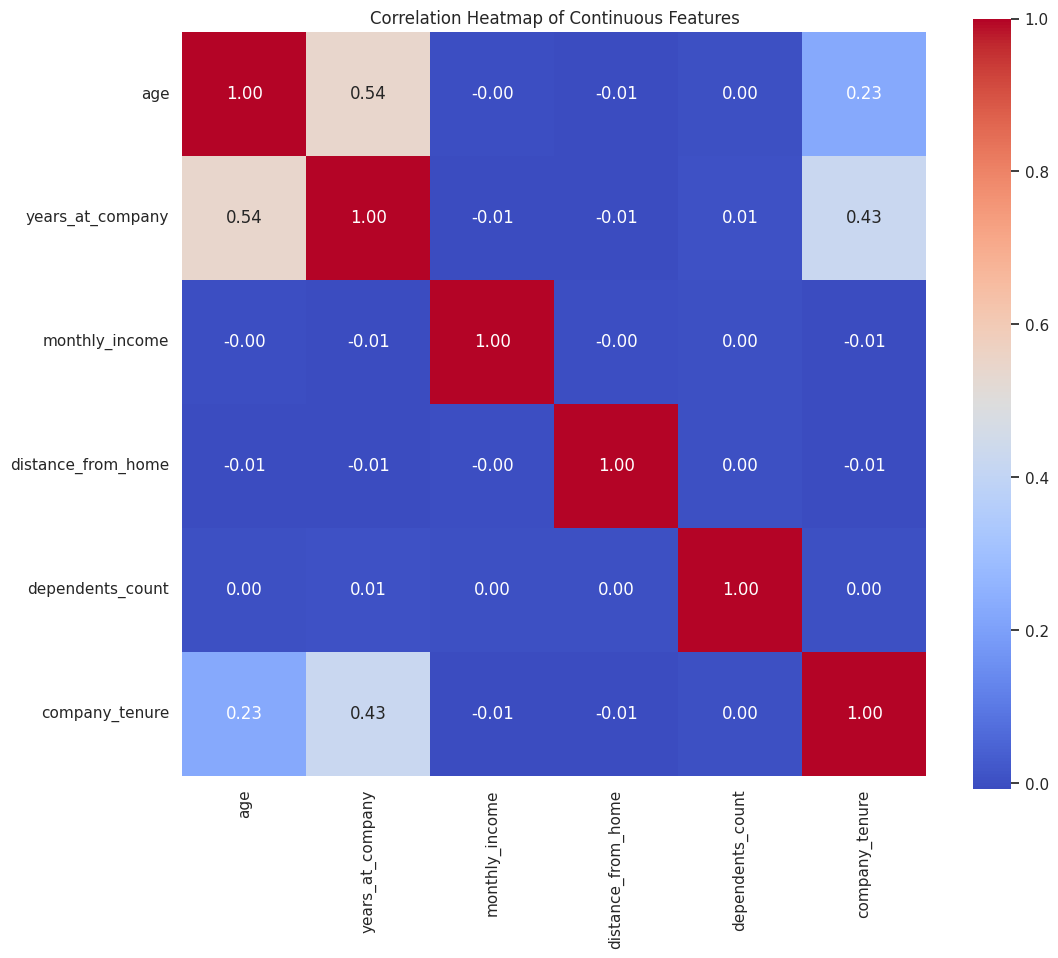

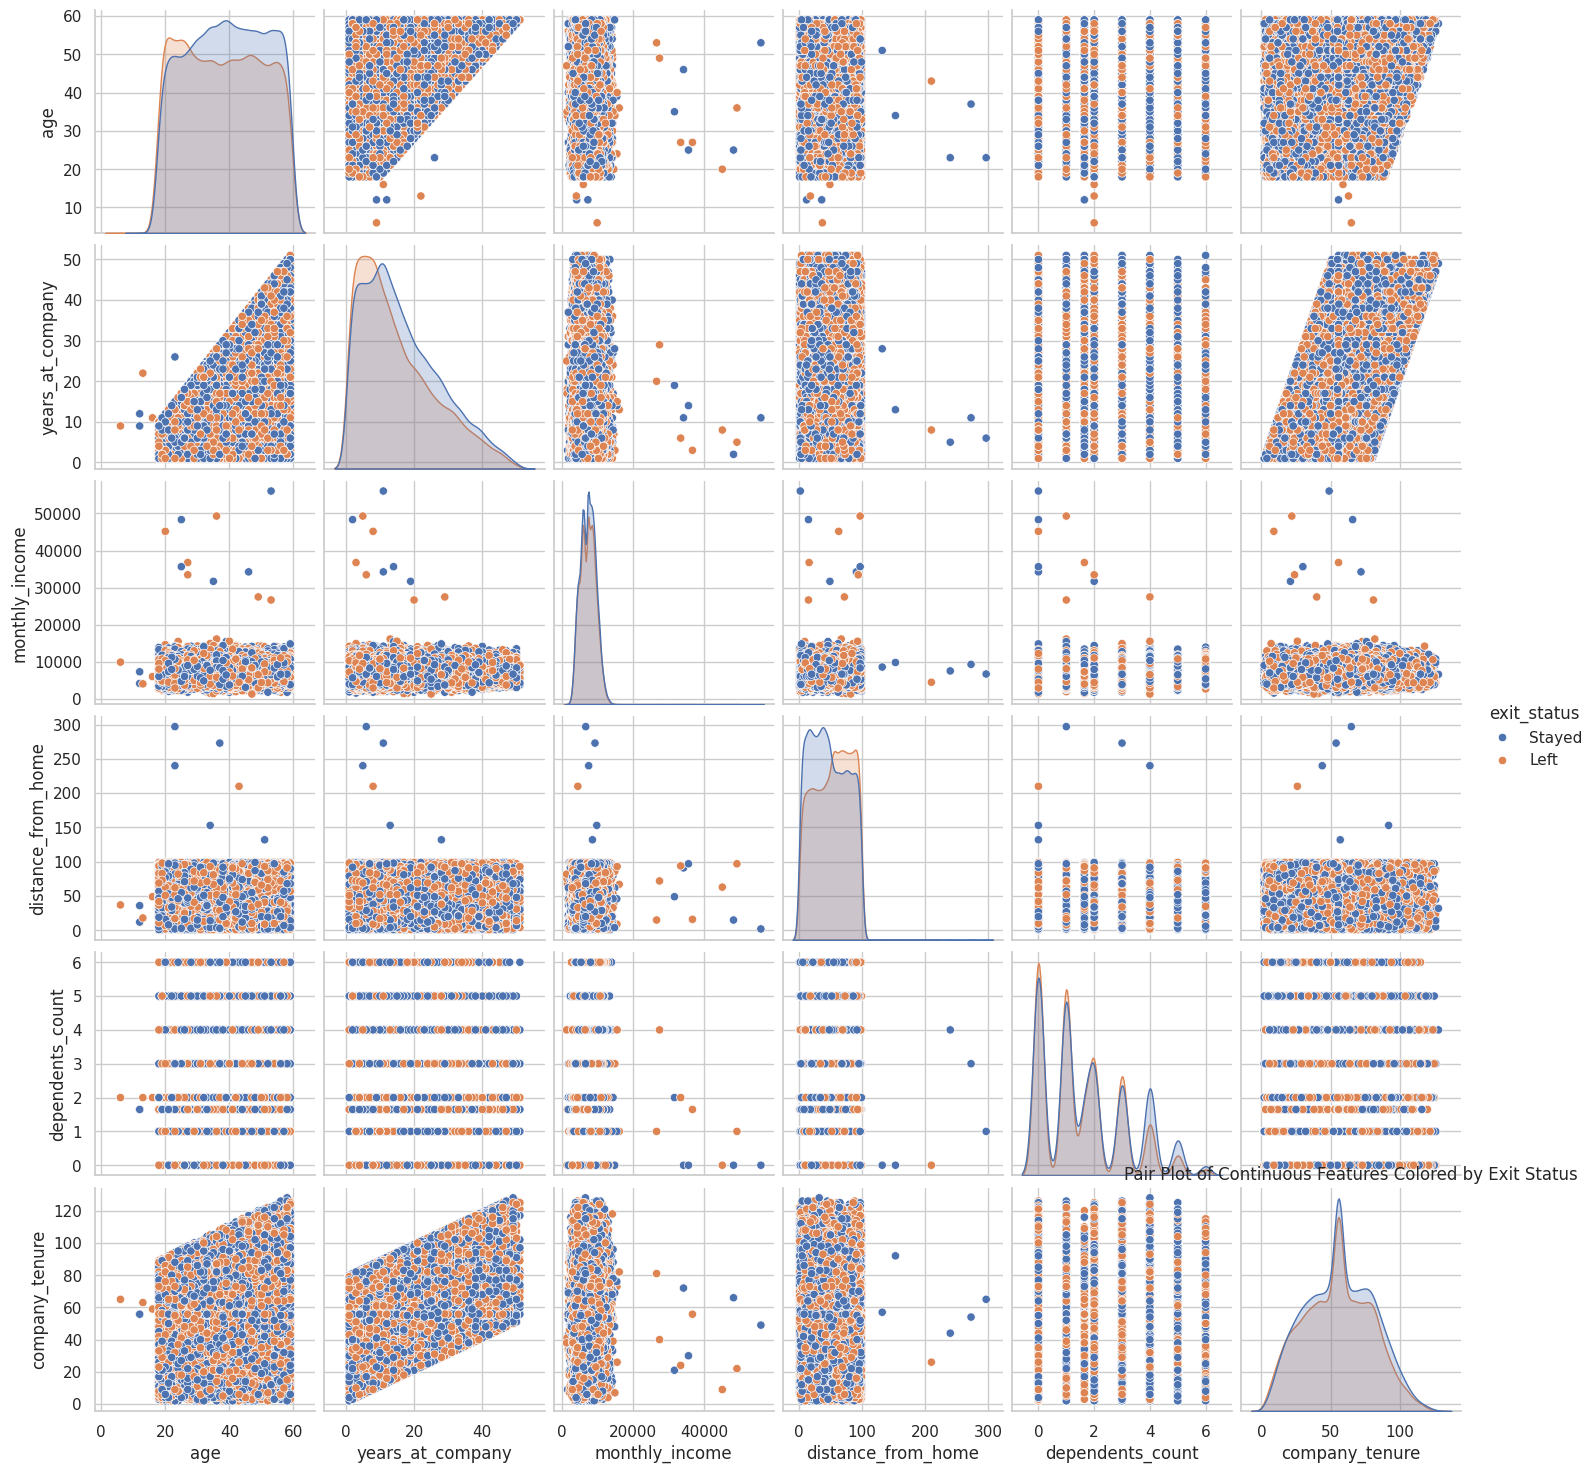

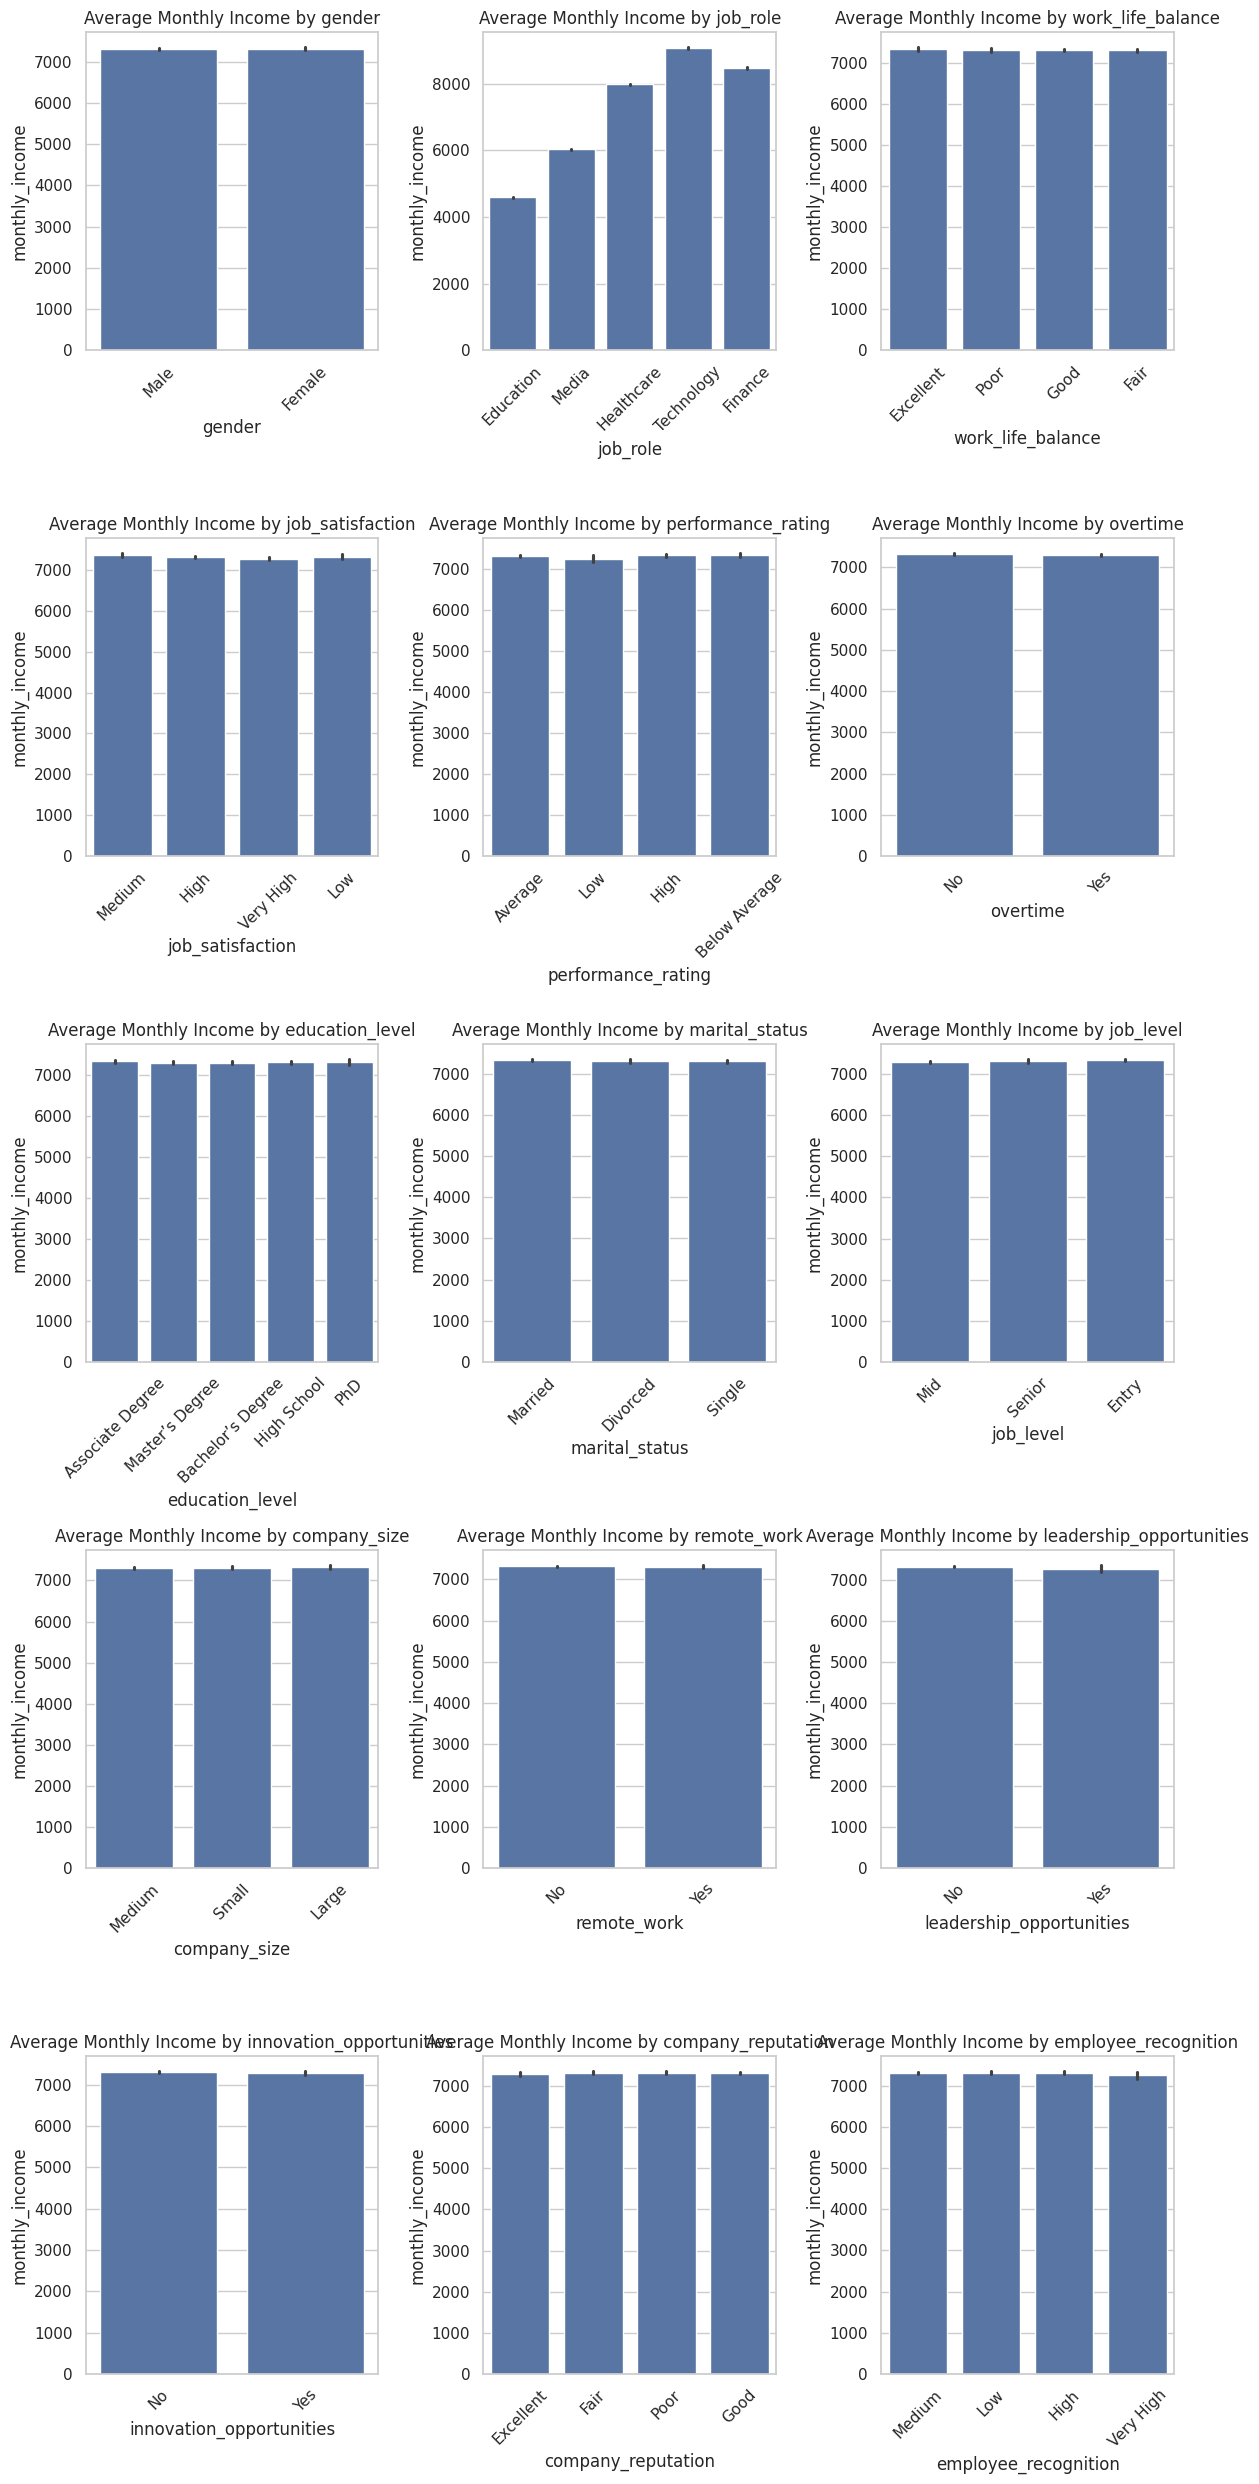

In [17]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Distribution of Continuous Features
num_continuous_features = len(continuous_features)
cols = 2  # Number of columns for the subplot
rows = (num_continuous_features + cols - 1) // cols  # Calculate rows needed

plt.figure(figsize=(12, 5 * rows))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 2. Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[continuous_features])
plt.title('Boxplot of Continuous Features')
plt.xticks(rotation=45)
plt.show()

# 3. Count Plots for Categorical Features
num_categorical_features = len(categorical_features)
cols = 3  # Number of columns for the subplot
rows = (num_categorical_features + cols - 1) // cols  # Calculate rows needed

plt.figure(figsize=(12, 5 * rows))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

# 5. Pair Plots
sns.pairplot(df[continuous_features + ['exit_status']], hue='exit_status', diag_kind='kde')
plt.title('Pair Plot of Continuous Features Colored by Exit Status')
plt.show()

# 6. Bar Plots for Categorical Features
plt.figure(figsize=(12, 5 * rows))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, cols, i)
    sns.barplot(data=df, x=feature, y='monthly_income', estimator=np.mean)
    plt.title(f'Average Monthly Income by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Binary categorical features to label encode
binary_features = ['gender', 'overtime', 'remote_work', 'leadership_opportunities', 'innovation_opportunities', 'exit_status']

# Dictionary to store label encoders for binary features
label_encoders = {}

# Apply Label Encoding for binary features
for feature in binary_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le  # Store the encoder
    df[feature] = df[feature].astype(bool)

# Multi-category features to one-hot encode
multi_category_features = ['job_role', 'work_life_balance', 'job_satisfaction', 'performance_rating',
                           'education_level', 'marital_status', 'job_level', 'company_size',
                           'company_reputation', 'employee_recognition']

# Apply One-Hot Encoding for multi-category features
df = pd.get_dummies(df, columns=multi_category_features, drop_first=True)

# Check the resulting dataframe
print(df.head())




   response_id  age  gender  years_at_company  monthly_income  \
0         8410   31    True                19          5390.0   
1        64756   59   False                 4          5534.0   
2        30257   24   False                10          8159.0   
3        65791   36   False                 7          3989.0   
4        65026   56    True                41          4821.0   

   promotions_count  overtime  distance_from_home  dependents_count  \
0                 2     False                  22               0.0   
1                 3     False                  21               3.0   
2                 0     False                  11               3.0   
3                 1     False                  27               2.0   
4                 0      True                  71               0.0   

   company_tenure  ...  job_level_Mid  job_level_Senior  company_size_Medium  \
0            89.0  ...           True             False                 True   
1            21.0  ...

In [19]:
# Now, `label_encoders` holds each LabelEncoder for binary categorical features
print("Stored label encoders for binary features:", label_encoders)

Stored label encoders for binary features: {'gender': LabelEncoder(), 'overtime': LabelEncoder(), 'remote_work': LabelEncoder(), 'leadership_opportunities': LabelEncoder(), 'innovation_opportunities': LabelEncoder(), 'exit_status': LabelEncoder()}


In [20]:
df.head()

,response_id,age,gender,years_at_company,monthly_income,promotions_count,overtime,distance_from_home,dependents_count,company_tenure,...,job_level_Mid,job_level_Senior,company_size_Medium,company_size_Small,company_reputation_Fair,company_reputation_Good,company_reputation_Poor,employee_recognition_Low,employee_recognition_Medium,employee_recognition_Very High
0,8410,31,True,19,5390.0,2,False,22,0.0,89.0,...,True,False,True,False,False,False,False,False,True,False
1,64756,59,False,4,5534.0,3,False,21,3.0,21.0,...,True,False,True,False,True,False,False,True,False,False
2,30257,24,False,10,8159.0,0,False,11,3.0,74.0,...,True,False,True,False,False,False,True,True,False,False
3,65791,36,False,7,3989.0,1,False,27,2.0,50.0,...,True,False,False,True,False,True,False,False,True,False
4,65026,56,True,41,4821.0,0,True,71,0.0,68.0,...,False,True,True,False,True,False,False,False,True,False


In [21]:

df_no_outliers = (df)

# Scaling Numerical Features

In [22]:
# List of numerical features based on your dataset
numerical_features = [
    'age',
    'years_at_company',
    'monthly_income',
    'distance_from_home',
    'dependents_count',
    'company_tenure'
]


In [23]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [24]:
df1=df

# Skewness Analysis

In [25]:
# Calculate skewness for numerical features
skewness = df1[numerical_features].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)


Skewness of numerical features:
 monthly_income        0.812080
years_at_company      0.788144
dependents_count      0.748117
company_tenure        0.070145
distance_from_home    0.029133
age                  -0.007507
dtype: float64


In [26]:
# Identify features with absolute skewness greater than 1
high_skew = skewness[abs(skewness) > 1].index.tolist()
print("Highly skewed features:", high_skew)


Highly skewed features: []


In [27]:

df1['remote_work_distance'] = np.where(df1['remote_work'] == 'Yes', df1['distance_from_home'], 0)

# 2. Aggregation Features
# Promotion Rate
df1['promotion_rate'] = np.where(df1['years_at_company'] != 0, df1['promotions_count'] / df1['years_at_company'], 0)

# Income per Dependent
df1['income_per_dependent'] = df1['monthly_income'] / (df1['dependents_count'] + 1)

# Display the first few rows of the updated DataFrame to check results
print(df1.head())

   response_id       age  gender  years_at_company  monthly_income  \
0         8410 -0.626041    True          0.288648       -0.887646   
1        64756  1.691446   False         -1.045173       -0.821110   
2        30257 -1.205413   False         -0.511645        0.391793   
3        65791 -0.212204   False         -0.778409       -1.534989   
4        65026  1.443144    True          2.244918       -1.150557   

   promotions_count  overtime  distance_from_home  dependents_count  \
0                 2     False           -0.982590         -1.104694   
1                 3     False           -1.017653          0.905710   
2                 0     False           -1.368285          0.905710   
3                 1     False           -0.807274          0.235576   
4                 0      True            0.735507         -1.104694   

   company_tenure  ...  company_size_Small  company_reputation_Fair  \
0        1.356737  ...               False                    False   
1       -1

In [28]:
X = df1.drop(columns=['exit_status','response_id'])
y = df1['exit_status']

In [29]:
print(X.columns)

Index(['age', 'gender', 'years_at_company', 'monthly_income',
       'promotions_count', 'overtime', 'distance_from_home',
       'dependents_count', 'company_tenure', 'remote_work',
       'leadership_opportunities', 'innovation_opportunities',
       'job_role_Finance', 'job_role_Healthcare', 'job_role_Media',
       'job_role_Technology', 'work_life_balance_Fair',
       'work_life_balance_Good', 'work_life_balance_Poor',
       'job_satisfaction_Low', 'job_satisfaction_Medium',
       'job_satisfaction_Very High', 'performance_rating_Below Average',
       'performance_rating_High', 'performance_rating_Low',
       'education_level_Bachelor’s Degree', 'education_level_High School',
       'education_level_Master’s Degree', 'education_level_PhD',
       'marital_status_Married', 'marital_status_Single', 'job_level_Mid',
       'job_level_Senior', 'company_size_Medium', 'company_size_Small',
       'company_reputation_Fair', 'company_reputation_Good',
       'company_reputation_Poor'

# Preparing Data for Modeling

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Model Selection and Hyperparameter Tuning

In [31]:
models = {
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    }),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=6969), {
        'n_estimators': [1800],
        'max_depth': [1],
        'learning_rate': [0.4],
        'subsample': [0.60]
    }),
    'Naive Bayes': (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.2, 0.3]
    })

}

# Model Evaluation

In [32]:
best_results = {}
best_overall_model = None
highest_f1_score = 0  # To track the model with the highest F1 score

# Perform Grid Search for each model
for model_name, (model, params) in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted', n_jobs=-1)  # Use weighted F1 score for scoring
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_  # F1 score from cross-validation

    # Evaluate on the test set
    test_predictions = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_f1_score = f1_score(y_test, test_predictions, average='weighted')  # F1 score on test set

    # Store the results
    best_results[model_name] = {
        'Best Parameters': best_params,
        'CV F1 Score': best_score,
        'Test Accuracy': test_accuracy,
        'Test F1 Score': test_f1_score
    }

    # Track the model with the highest F1 score for saving
    if test_f1_score > highest_f1_score:
        highest_f1_score = test_f1_score
        best_overall_model = best_model

    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"{model_name} - CV F1 Score: {best_score:.4f}")
    print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} - Test F1 Score: {test_f1_score:.4f}\n")

# Save the best overall model
if best_overall_model:
    joblib.dump(best_overall_model, 'best_model.joblib')
    print("Best model saved as 'best_model.joblib'.")

# Display all results
print("\nBest Model Results:")
for model_name, result in best_results.items():
    print(f"{model_name}: {result}")


Running GridSearchCV for Decision Tree...
Decision Tree - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree - CV F1 Score: 0.7198
Decision Tree - Test Accuracy: 0.7221
Decision Tree - Test F1 Score: 0.7222

Running GridSearchCV for Random Forest...
Random Forest - Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - CV F1 Score: 0.7446
Random Forest - Test Accuracy: 0.7411
Random Forest - Test F1 Score: 0.7409

Running GridSearchCV for XGBoost...


/home/hemang/Downloads/ML/venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:10:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/hemang/Downloads/ML/venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:10:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/hemang/Downloads/ML/venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:10:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/hemang/Downloads/ML/venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:10:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/hemang/Downloads/ML/venv/lib/python3.11/site-packages/xgboost/core

XGBoost - Best Parameters: {'learning_rate': 0.4, 'max_depth': 1, 'n_estimators': 1800, 'subsample': 0.6}
XGBoost - CV F1 Score: 0.7531
XGBoost - Test Accuracy: 0.7492
XGBoost - Test F1 Score: 0.7491

Running GridSearchCV for Naive Bayes...
Naive Bayes - Best Parameters: {'var_smoothing': 1e-07}
Naive Bayes - CV F1 Score: 0.7152
Naive Bayes - Test Accuracy: 0.7193
Naive Bayes - Test F1 Score: 0.7192

Running GridSearchCV for KNN...
KNN - Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}
KNN - CV F1 Score: 0.6473
KNN - Test Accuracy: 0.6505
KNN - Test F1 Score: 0.6505

Running GridSearchCV for AdaBoost...


/home/hemang/Downloads/ML/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/hemang/Downloads/ML/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/hemang/Downloads/ML/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/hemang/Downloads/ML/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

AdaBoost - Best Parameters: {'learning_rate': 0.3, 'n_estimators': 100}
AdaBoost - CV F1 Score: 0.7517
AdaBoost - Test Accuracy: 0.7488
AdaBoost - Test F1 Score: 0.7487

Best model saved as 'best_model.joblib'.

Best Model Results:
Decision Tree: {'Best Parameters': {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}, 'CV F1 Score': np.float64(0.7197928580032313), 'Test Accuracy': 0.7220637583892617, 'Test F1 Score': np.float64(0.7222178607955242)}
Random Forest: {'Best Parameters': {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}, 'CV F1 Score': np.float64(0.7445692767074455), 'Test Accuracy': 0.7411073825503356, 'Test F1 Score': np.float64(0.7409345506510788)}
XGBoost: {'Best Parameters': {'learning_rate': 0.4, 'max_depth': 1, 'n_estimators': 1800, 'subsample': 0.6}, 'CV F1 Score': np.float64(0.7531389909826185), 'Test Accuracy': 0.7491610738255033, 'Test F1 Score': np.float64(0.7490590292474347)}
Naive Bayes: {'Best Parameters': {'var_smoothing': 1e-07

# Preparing Test Data for Predictions

In [33]:
label_mapping = dict(zip(label_encoders['exit_status'].classes_, label_encoders['exit_status'].transform(label_encoders['exit_status'].classes_)))
print(label_mapping)

{'Left': np.int64(0), 'Stayed': np.int64(1)}


In [34]:
resid=test['response_id']
test=test.drop(columns=['response_id'])

# Apply the same preprocessing steps as done for df1

# Start of preprocessing 
# Example: handling missing values, encoding, scaling
# Impute missing values
for col in test.select_dtypes(include=['float', 'int']).columns:
    test[col].fillna(test[col].mean(), inplace=True)
for col in test.select_dtypes(include=['object']).columns:
    test[col].fillna(test[col].mode()[0], inplace=True)


# Binary categorical features to label encode
binary_features = ['gender', 'overtime', 'remote_work', 'leadership_opportunities', 'innovation_opportunities']

# Apply Label Encoding for binary features using the stored encoders
for feature in binary_features:
    if feature in label_encoders:  # Ensure we have a saved encoder for the feature
        test[feature] = label_encoders[feature].transform(test[feature])
        test[feature] = test[feature].astype(bool)

# Multi-category features to one-hot encode
multi_category_features = ['job_role', 'work_life_balance', 'job_satisfaction', 'performance_rating',
                           'education_level', 'marital_status', 'job_level', 'company_size',
                           'company_reputation', 'employee_recognition']

# Apply One-Hot Encoding for multi-category features
test = pd.get_dummies(test, columns=multi_category_features, drop_first=True)

test['remote_work_distance'] = np.where(test['remote_work'] == 'Yes', test['distance_from_home'], 0)

# Promotion Rate
test['promotion_rate'] = np.where(test['years_at_company'] != 0, test['promotions_count'] / test['years_at_company'], 0)

# Income per Dependent
test['income_per_dependent'] = test['monthly_income'] / (test['dependents_count'] + 1)

# Display the first few rows of the updated DataFrame to check results
# Check the resulting test dataframe

test[numerical_features] = scaler.transform(test[numerical_features])




/tmp/ipykernel_76611/3641765213.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].mean(), inplace=True)
/tmp/ipykernel_76611/3641765213.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

# Making Predictions

In [35]:
# Check the resulting dataframe
print(test.head())

# Predict on the preprocessed test set
xgb_test_predictions = best_overall_model.predict(test)

# Add predictions to the 'test' DataFrame
test['Predicted_XGBoost'] = xgb_test_predictions
dff=test['Predicted_XGBoost']
# Save the updated DataFrame to a CSV file
mapping = {0:'Left', 1:'Stayed'}
dfff = dff.map(mapping)
dfans = pd.DataFrame({'response_id': resid, 'exit_status': dfff})


        age  gender  years_at_company  monthly_income  promotions_count  \
0 -0.212204    True         -0.244881        0.331725                 1   
1 -0.294971    True         -0.778409       -1.269768                 1   
2  0.946539    True         -0.778409       -0.798469                 3   
3  1.608678    True          2.511683       -0.825268                 0   
4  0.036098    True          0.733255       -1.250824                 0   

   overtime  distance_from_home  dependents_count  company_tenure  \
0      True            1.156266         -0.434559       -1.379024   
1      True            0.174496          1.575845       -1.174863   
2      True           -1.263095          0.235576        0.825918   
3      True           -0.246263          1.575845        1.642563   
4      True           -0.106010          2.916114       -0.439882   

   remote_work  ...  company_size_Small  company_reputation_Fair  \
0        False  ...               False                    False  

In [36]:
# Save the predictions or results in 'dfans' to a CSV file
print(dfff)
dfans.to_csv('final_subm.csv', index=False)
print("Predictions added to 'test' and saved as 'test_with_predictions.csv'.")

0        Stayed
1          Left
2        Stayed
3          Left
4        Stayed
          ...  
14895      Left
14896      Left
14897    Stayed
14898      Left
14899    Stayed
Name: Predicted_XGBoost, Length: 14900, dtype: object
Predictions added to 'test' and saved as 'test_with_predictions.csv'.
